###Name : Soham Jadhav.      
###Email: sai.sohamiit@gmail.com
###Contact number: 8767443482

# **Problem Statement : Create a classification model to predict sentiment either (Positive or Negative) based on Covid Tweets**

###Steps to consider:
1)Read the dataset with encoding parameter set to ‘latin1’

2)Remove handle null values (if any).

3)Preprocess the Covid tweets based on the following parameter:

a) Tokenizing words
b) Convert words to lower case
c) Removing Punctuations
d) Removing Stop words
e) Stemming or lemmatizing the words

4)Convert the 'Extremely Positive' and 'Extremely Negative' Sentiments to 'Positive' and l
'Negative' sentiments respectively

5)Transform the words into vectors using
a)Count Vectorizer
OR
b)TF-IDF Vectorizer

6)Split data into training and test data.

7)Apply the following models on the training dataset and generate the predicted value
for the test dataset
a) Multinomial Naïve Bayes Classification
b) SVM Classification
c) KNN Classification

8)Predict the Sentiment for test data

9)Compute Confusion matrix and classification report for each of these models

10)Report the model with the best accuracy.

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

### Step 1: Read the dataset with encoding parameter set to ‘latin1’

In [ ]:
df = pd.read_csv('Corona_NLP (2).csv',encoding='latin1')

### Step 2: Remove handle null values (if any).

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [ ]:
# All of the null values are present in Location column. Either we can drop the records where Location is NaN
# or we can ignore the Location column as its not relevant for sentiment analysis.
# We can even impute the missing values using mode of the column.
# Lets drop the nan records
# df.dropna(inplace=True) # uncomment if want to drop all records where Location is NaN
df.drop('Location', inplace=True, axis=1) # uncomment if we want to drop `Location` column
df.reset_index(inplace=True, drop=True)

### Step 3: Preprocess the text


In [ ]:
import nltk, re
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
def clean_text(text):
    # remove punctuations first
    text = re.sub(r'[^\w\s]', '', text)

    text = re.sub(r'http\S+', ' ', text)

    # For removing html tags:
    text = re.sub(r'<.*?>', ' ', text)

    # For removing digits:
    text = re.sub(r'\d+', ' ', text)

    # For removing hashtags:
    text = re.sub(r'#\w+', ' ', text)

    # For removing mentions:
    text = re.sub(r'@\w+', ' ', text)

    # replace underscore
    text = text.replace('_', ' ')

    # lowercase
    text = text.lower()

    # tokenize
    text_tokens = word_tokenize(text)

    filtered_lemmatized_tokens = []

    for token in text_tokens:
        if token not in stop_words:
            filtered_lemmatized_tokens.append(lemmatizer.lemmatize(token))

    return ' '.join(filtered_lemmatized_tokens)

In [ ]:
df['CleanedTweet'] = df['OriginalTweet'].apply(clean_text)

### Step 4: Convert the 'Extremely Positive' and 'Extremely Negative' Sentiments to 'Positive' and 'Negative' sentiments respectively

In [ ]:
sentiment_encoding = {
    'Extremely Negative': 0,
    'Negative': 0,
    'Neutral': 1,
    'Positive': 2,
    'Extremely Positive': 2
}

df['Sentiment'] = df['Sentiment'].replace(sentiment_encoding)

### Step 5: Transforms words to vectors
(b)TF-IDF Vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [ ]:
vectorizer = TfidfVectorizer()
# vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['CleanedTweet'])



In [ ]:
X.shape

(41157, 55039)

### Step 6: Split data into training and test data.



In [ ]:
from sklearn.model_selection import train_test_split

Y = df['Sentiment'].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, shuffle=True, test_size=0.25)

### Step 7: Apply the following models on the training dataset
a) Multinomial Naïve Bayes Classification <br>
b) SVM Classification <br>
c) KNN Classification <br>

a) Multinomial Naïve Bayes Classification

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
mNB = MultinomialNB()
mNB.fit(X_train, Y_train)

score = mNB.score(X_test, Y_test)
print('Multinomial Naive Bayes Accuracy:', score*100.0)

Multinomial Naive Bayes Accuracy: 62.857142857142854


b) SVM Classification

In [ ]:
import pickle as pb

svc = SVC(kernel='linear')
svc.fit(X_train, Y_train)

score = svc.score(X_test, Y_test)
print('SVM Classifier Accuracy:', score*100.0)

# save svm model
with open('svm.model', 'wb') as f:
    pb.dump(svc, f)

# uncomment below lines to load the model
# with open('svm.model', 'rb') as f:
#     svc = pb.load(f)

SVM Classifier Accuracy: 78.70748299319727


c) KNN Classification

In [ ]:
knn = KNeighborsClassifier(n_neighbors=200)
knn.fit(X_train, Y_train)

score = knn.score(X_test, Y_test)
print('K Nearest Neighbors Classifier Accuracy:', score*100.0)

K Nearest Neighbors Classifier Accuracy: 63.11953352769679


###Step 8 : Predict the Sentiment for test data

a) Multinomial Naïve Bayes Classification

In [ ]:
mNB.predict(X_test)

array([2, 2, 0, ..., 2, 2, 2])

b) SVM Classification

In [ ]:
svc.predict(X_test)

array([2, 2, 0, ..., 2, 2, 2])

c) KNN Classification

In [ ]:
knn.predict(X_test)

array([2, 2, 0, ..., 2, 2, 2])

###Step 9: Compute Confusion matrix and classification report for each of these models

a) Multinomial Naïve Bayes Classification <br>
b) SVM Classification <br>
c) KNN Classification <br>

In [ ]:
import seaborn as sns

a) Multinomial Naïve Bayes Classification

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
Y_predmNB = mNB.predict(X_test)

In [ ]:
cm_mNB = confusion_matrix(Y_test , Y_predmNB)
print(cm_mNB)

[[2344    2 1592]
 [ 390   30 1481]
 [ 353    4 4094]]


In [ ]:
import matplotlib.pyplot as plt


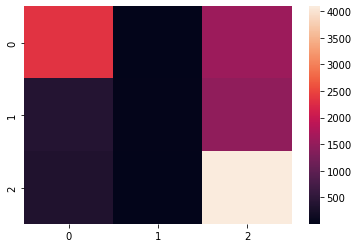

In [ ]:
sns.heatmap(cm_mNB)
plt.show()

In [ ]:
print(classification_report(Y_test,Y_predmNB))

              precision    recall  f1-score   support

           0       0.76      0.60      0.67      3938
           1       0.83      0.02      0.03      1901
           2       0.57      0.92      0.70      4451

    accuracy                           0.63     10290
   macro avg       0.72      0.51      0.47     10290
weighted avg       0.69      0.63      0.57     10290



b) SVM Classification

In [ ]:
Y_predsvc = svc.predict(X_test)

In [ ]:
cm_svc = confusion_matrix(Y_test , Y_predsvc)
print(cm_svc)

[[3125  278  535]
 [ 336 1233  332]
 [ 452  258 3741]]


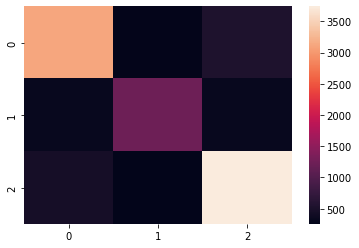

In [ ]:
sns.heatmap(cm_svc)
plt.show()

In [ ]:
print(classification_report(Y_test,Y_predsvc))

              precision    recall  f1-score   support

           0       0.80      0.79      0.80      3938
           1       0.70      0.65      0.67      1901
           2       0.81      0.84      0.83      4451

    accuracy                           0.79     10290
   macro avg       0.77      0.76      0.76     10290
weighted avg       0.79      0.79      0.79     10290



c) KNN Classification

In [ ]:
Y_predknn = knn.predict(X_test)

In [ ]:
cm_knn = confusion_matrix(Y_test , Y_predknn)
print(cm_knn)

[[2270  351 1317]
 [ 359  631  911]
 [ 538  319 3594]]


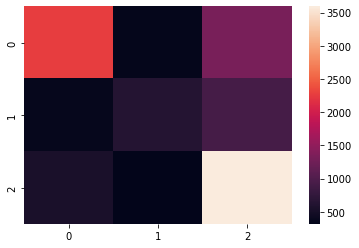

In [ ]:
sns.heatmap(cm_knn)
plt.show()

In [ ]:
print(classification_report(Y_test,Y_predknn))

              precision    recall  f1-score   support

           0       0.72      0.58      0.64      3938
           1       0.49      0.33      0.39      1901
           2       0.62      0.81      0.70      4451

    accuracy                           0.63     10290
   macro avg       0.61      0.57      0.58     10290
weighted avg       0.63      0.63      0.62     10290



###Step 10 : Report the model with the best accuracy.

Model with the best accuracy: SVM Classifier
SVM Classifier Accuracy: 79.3974732750243

SVM Classifier is the model with highest accuracy obtained if compared with the 'Multinomial Naive Bayes Classification' and 'KNN Classification'.
SVM Classifier offers best accuracy because it works by mapping data to a high-dimensional feature space so that data points can be categorized, even when the data are not otherwise linearly separable. A separator between the categories is found, then the data are transformed in such a way that the separator could be drawn as a hyperplane.

# ***THANKYOU***